In [46]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel
df = pd.read_excel('C:/Users/msdelacruz/OneDrive - UNICEF/Documentos/Reporte/Especializacion/Business Analysis Introduction/Clase 2 1412/211702-XLS-ENG.xlsx', sheet_name='base')

In [47]:
df.head()

,Unnamed: 0,Sale Date,Vessel Name,Sale Price,year Built,Age at Sale,Dead-Weight Tons,Trailing 1-Year Average Monthly Baltic Dry
0,1,2007-01-01,Lowlands Beilun,73.0,1999,8,170.2,4647.083333
1,2,2007-01-01,CHS Moon,45.0,1991,16,150.2,4647.083333
2,3,2007-01-01,Spring Brave,62.0,1995,12,151.1,4647.083333
3,4,2007-01-01,Martha Verity,60.0,1995,12,158.0,4647.083333
4,5,2007-01-01,TMT TBN,61.3,1993,14,174.7,4647.083333


In [48]:
# we can drop the first column as it is just the index
df.drop(columns = 'Unnamed: 0', inplace=True)

In [49]:
# Asumiendo que Base es tu DataFrame y Sale.Date es una columna de tipo datetime
df['Flag_fecha'] = df['Sale Date'].apply(lambda x: 0 if int(x.strftime('%Y%m')) <= 200706 else 1)



In [50]:
# Crear una nueva columna con el producto
df['Age_Sale_Flag'] = df['Age at Sale'] * df['Flag_fecha']


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Sale Date                                   48 non-null     datetime64[ns]
 1   Vessel Name                                 48 non-null     object        
 2   Sale Price                                  48 non-null     float64       
 3   year Built                                  48 non-null     int64         
 4   Age at Sale                                 48 non-null     int64         
 5   Dead-Weight Tons                            48 non-null     float64       
 6   Trailing 1-Year Average Monthly Baltic Dry  48 non-null     float64       
 7   Flag_fecha                                  48 non-null     int64         
 8   Age_Sale_Flag                               48 non-null     int64         
dtypes: datetime64

In [52]:
df.tail()

,Sale Date,Vessel Name,Sale Price,year Built,Age at Sale,Dead-Weight Tons,Trailing 1-Year Average Monthly Baltic Dry,Flag_fecha,Age_Sale_Flag
43,2008-03-01,Samos,25.0,1982,26,137.0,11193.000000,1,26
44,2008-03-01,Cape Sun,135.0,1999,9,171.7,11193.000000,1,9
45,2008-04-01,Nightflight,158.0,2004,4,170.0,11613.500000,1,4
46,2008-05-01,Cape Falcon,87.2,1993,15,161.5,12479.333333,1,15
47,2008-05-01,Castle Peak,82.0,1990,18,145.4,12479.333333,1,18


## Regresion Lineal Múltiple

In [53]:
from sklearn import linear_model
mlr_model = linear_model.LinearRegression()
mlr_model.fit(df[['Age at Sale', 'Dead-Weight Tons', 'Trailing 1-Year Average Monthly Baltic Dry','Flag_fecha','Age_Sale_Flag']], df['Sale Price'])

LinearRegression()

In [54]:
df['Sale Price Predicted']  = mlr_model.predict(df[['Age at Sale', 'Dead-Weight Tons', 'Trailing 1-Year Average Monthly Baltic Dry','Flag_fecha','Age_Sale_Flag']]) 
df['Error'] = (df['Sale Price Predicted'] - df['Sale Price'])**2
MSE_MLR = df['Error'].mean()

In [55]:
R2=mlr_model.score(df[['Age at Sale', 'Dead-Weight Tons', 'Trailing 1-Year Average Monthly Baltic Dry','Flag_fecha','Age_Sale_Flag']], df['Sale Price'])

In [56]:
print(f"El Error Cuadrático Medio (MSE) del modelo de regresión lineal es: {MSE_MLR}")
print(f"El coeficiente de determinación R^2 del modelo de regresión lineal es: {R2}")

El Error Cuadrático Medio (MSE) del modelo de regresión lineal es: 54.2641862490853
El coeficiente de determinación R^2 del modelo de regresión lineal es: 0.9517634867584361


In [57]:
import statsmodels.formula.api as smf
# Renombrar columnas para que sean válidas en la fórmula
df = df.rename(columns={
    'Sale Price': 'Sale_Price',
    'Age at Sale': 'Age_at_Sale',
    'Dead-Weight Tons': 'Dead_Weight_Tons',
    'Trailing 1-Year Average Monthly Baltic Dry': 'Trailing_1_Year_Avg_Monthly_Baltic_Dry'
})

# Ajustar el modelo con los nuevos nombres
lm1 = smf.ols(formula='Sale_Price ~ Age_at_Sale + Dead_Weight_Tons + Trailing_1_Year_Avg_Monthly_Baltic_Dry + Flag_fecha + Age_Sale_Flag', data=df).fit()

# Imprimir los resultados
print(lm1.params)
print(lm1.summary())


Intercept                                 40.133748
Age_at_Sale                               -3.404078
Dead_Weight_Tons                           0.272237
Trailing_1_Year_Avg_Monthly_Baltic_Dry     0.004147
Flag_fecha                                40.358234
Age_Sale_Flag                             -1.726679
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     165.7
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           1.65e-26
Time:                        12:51:06   Log-Likelihood:                -163.96
No. Observations:                  48   AIC:                             339.9
Df Residuals:                      42   BIC:                             351.2
Df Model:                           5    

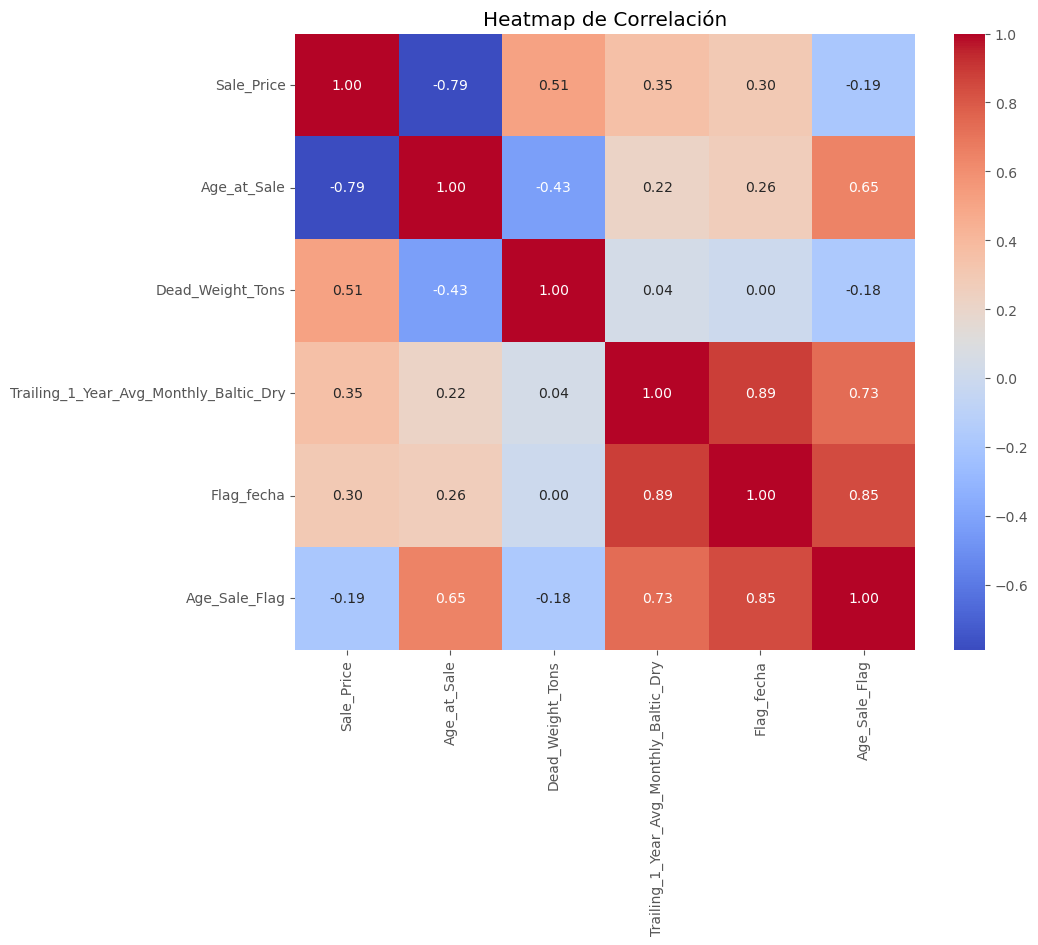

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables independientes y la variable dependiente
variables = ['Sale_Price', 'Age_at_Sale', 'Dead_Weight_Tons', 'Trailing_1_Year_Avg_Monthly_Baltic_Dry', 'Flag_fecha', 'Age_Sale_Flag']

# Filtrar el DataFrame para incluir solo las variables seleccionadas
df_filtered = df[variables]

# Calcular la matriz de correlación
correlation_matrix = df_filtered.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap de Correlación')
plt.show()


### Visualización de las bandas de confianza en regresión lineal simple

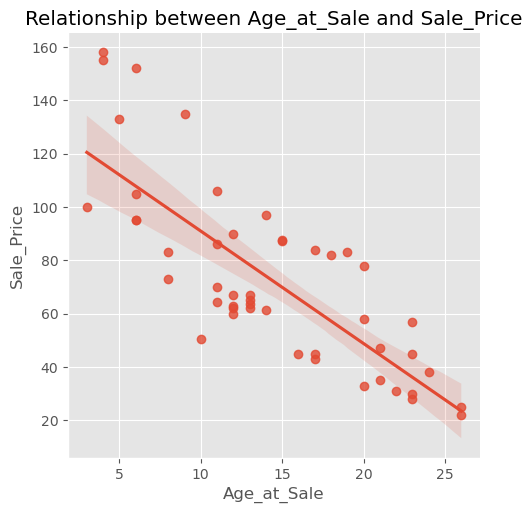

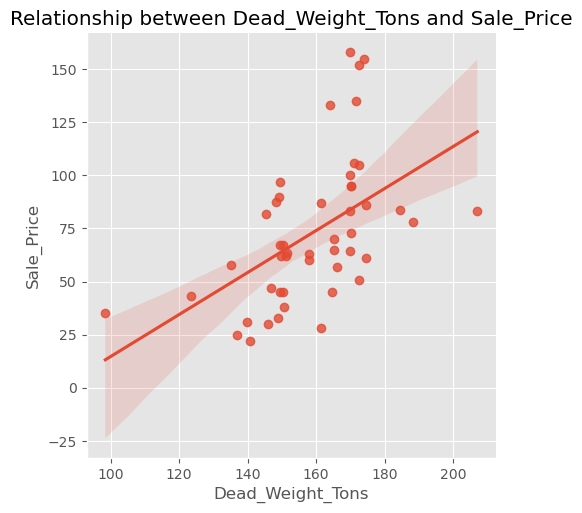

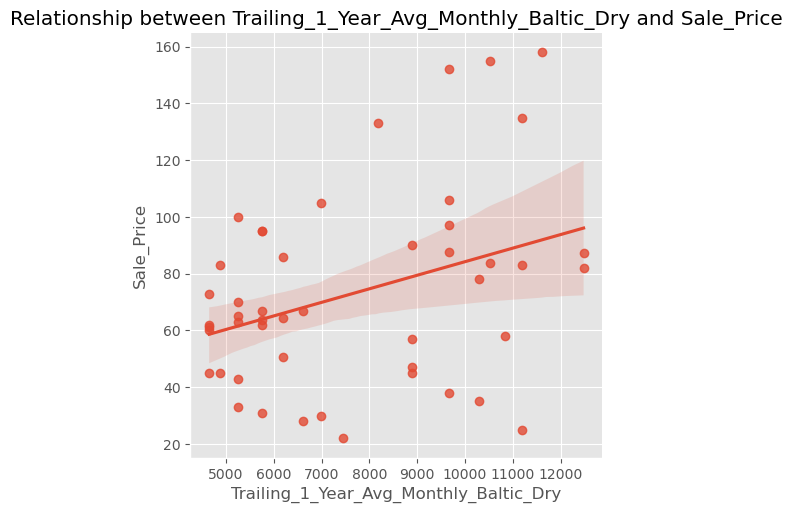

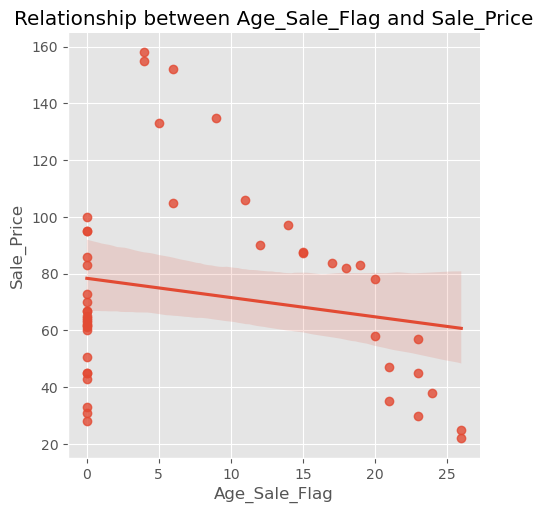

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables independientes
independent_vars = ['Age_at_Sale', 'Dead_Weight_Tons', 'Trailing_1_Year_Avg_Monthly_Baltic_Dry', 'Age_Sale_Flag']

# Crear un lmplot para cada variable independiente frente a Sale_Price
for var in independent_vars:
    sns.lmplot(x=var, y='Sale_Price', data=df)
    plt.title(f'Relationship between {var} and Sale_Price') 
    plt.show()  



In [60]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [61]:
# División de los datos en train y test
# ==============================================================================
X = df.drop(columns=['Sale_Price','Sale Price Predicted','Error', 'Sale Date', 'Vessel Name','year Built','Flag_fecha'])
y = df['Sale_Price']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [62]:
X_train.dtypes
X_test.dtypes

Age_at_Sale                                 int64
Dead_Weight_Tons                          float64
Trailing_1_Year_Avg_Monthly_Baltic_Dry    float64
Age_Sale_Flag                               int64
dtype: object

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular el MSE y R^2 en el conjunto de prueba
rmse_ols = mean_squared_error(y_test, y_pred)
R2_test = r2_score(y_test, y_pred)

print(f"El Error Cuadrático Medio (MSE) en el conjunto de prueba es: {rmse_ols}")
print(f"El coeficiente de determinación R^2 en el conjunto de prueba es: {R2_test}")



El Error Cuadrático Medio (MSE) en el conjunto de prueba es: 117.24504694338414
El coeficiente de determinación R^2 en el conjunto de prueba es: 0.7599292972456675


Las predicciones del modelo final se alejan en promedio 177.25 unidades del valor real.

## Regularización

## Regresión Ridge

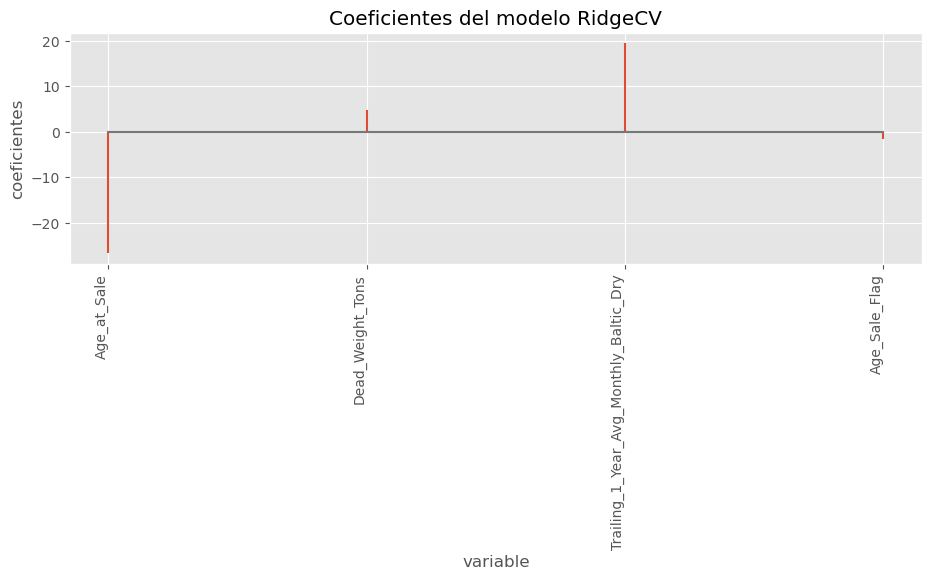

In [64]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
# Crear un pipeline que primero escale los datos y luego ajuste el modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RidgeCV(
        alphas=np.logspace(-10, 2, 200),
        fit_intercept=True,
        store_cv_values=True
    ))
])

pipeline.fit(X_train, y_train)
modelo = pipeline.named_steps['model']
df_coeficientes = pd.DataFrame(
    {'predictor': X_train.columns,
     'coef': modelo.coef_.flatten()}
)
fig, ax = plt.subplots(figsize=(11, 3))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo RidgeCV')
plt.show()

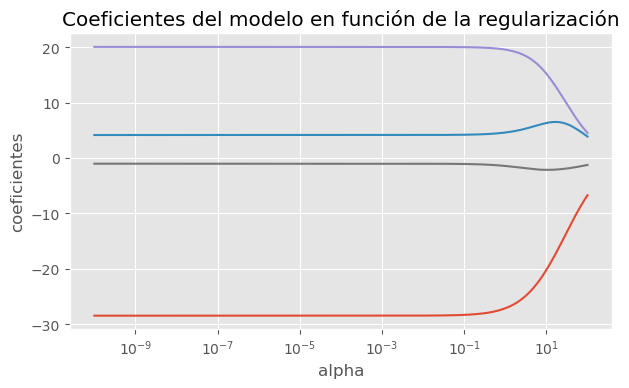

In [65]:
from sklearn.pipeline import Pipeline, make_pipeline
# Evolución de los coeficientes en función de alpha
# ==============================================================================
# Definir alphas para la regularización
alphas = np.logspace(-10, 2, 200)
coefs = []

# Iterar sobre cada valor de alpha
for alpha in alphas:
    # Crear un pipeline que normaliza los datos y luego ajusta el modelo Ridge
    modelo_temp = make_pipeline(StandardScaler(), Ridge(alpha=alpha, fit_intercept=False))
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.named_steps['ridge'].coef_.flatten())

# Visualización de la evolución de los coeficientes en función de alpha
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.axis('tight')
plt.show()

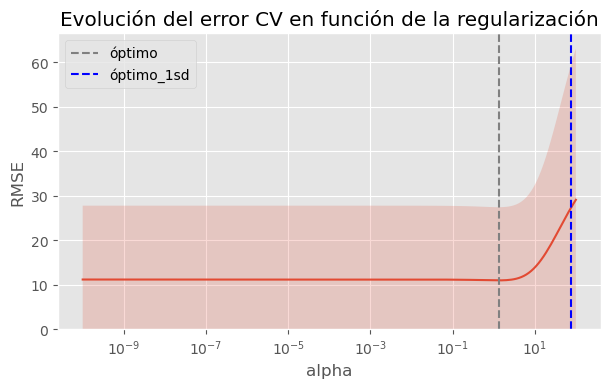

In [66]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = np.sqrt(mse_sd[np.argmin(rmse_cv)])  # Se calcula la raíz cuadrada del MSE_SD
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])

# Se obtiene el valor óptimo de alpha
optimo       = modelo.alphas[np.argmin(rmse_cv)]

# Se obtiene el valor de alpha que corresponde a min_rsme_1sd, si existe
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]



# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();


In [67]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 1.350993521198025


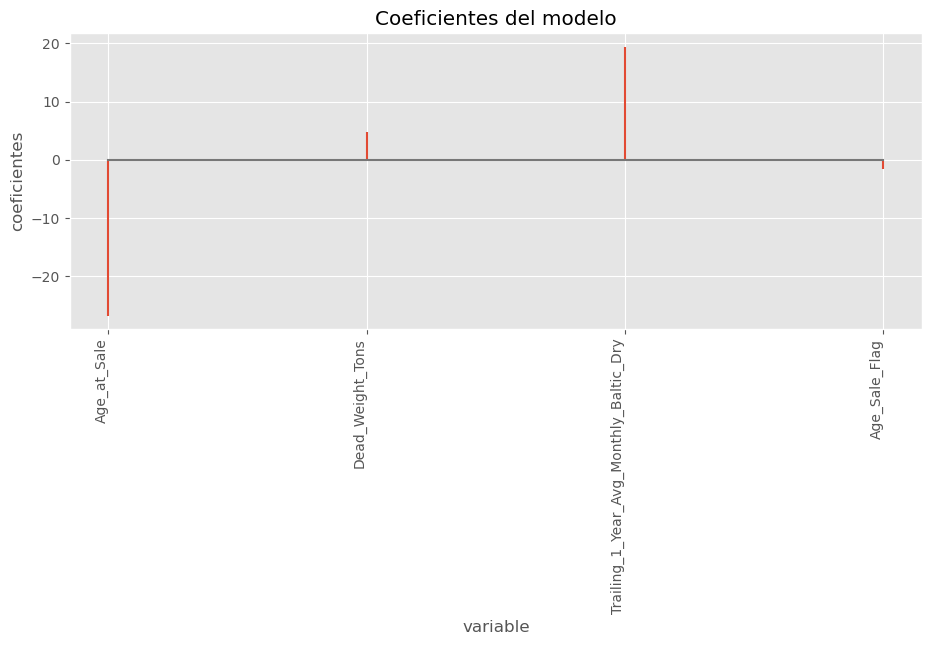

In [68]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [69]:
# Predicciones test utilizando el pipeline
# ==============================================================================
predicciones = pipeline.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([ 63.22146824, 109.5621071 ,  98.46840343,  66.86616292,
        49.90696662,  43.6591415 ,  56.73172354,  46.36336567,
        98.46840343,  21.92187297])

In [70]:
from sklearn.metrics import mean_squared_error

# Error de test del modelo RidgeCV
# ==============================================================================
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (RMSE) de test es: {rmse_ridge}")



El error (RMSE) de test es: 10.370302898316588


Las predicciones del modelo final se alejan en promedio 10.37 unidades del valor real.

## Regresión Lasso

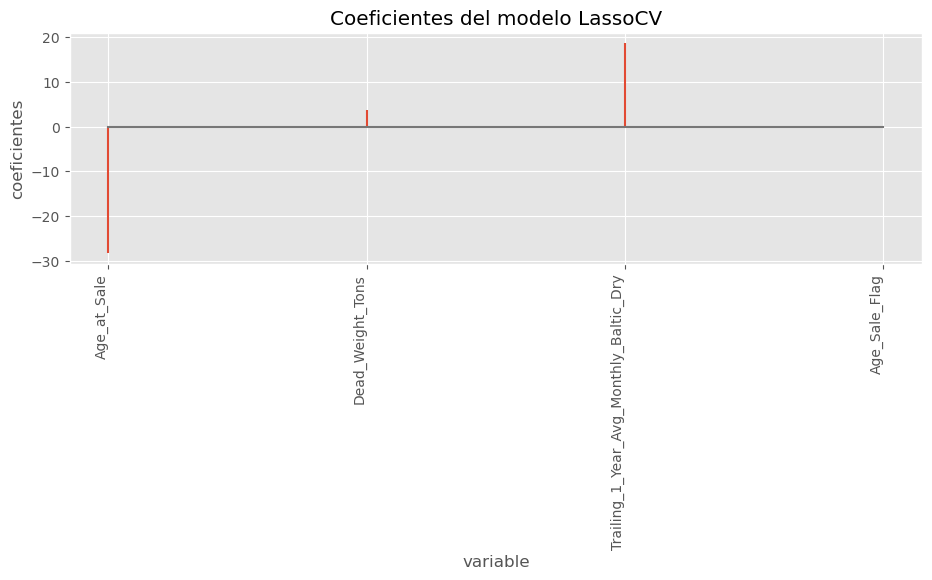

In [71]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Creación y entrenamiento del modelo con búsqueda por CV del valor óptimo alpha
# ==============================================================================
# Definir el pipeline que incluye el escalado y LassoCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LassoCV(alphas=np.logspace(-10, 3, 200), cv=10))
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Obtener el mejor modelo de LassoCV del pipeline
modelo = pipeline.named_steps['model']

# Coeficientes del modelo
df_coeficientes = pd.DataFrame({
    'predictor': X_train.columns,
    'coef': modelo.coef_
})

# Visualización de los coeficientes del modelo
fig, ax = plt.subplots(figsize=(11, 3))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo LassoCV')
plt.show()


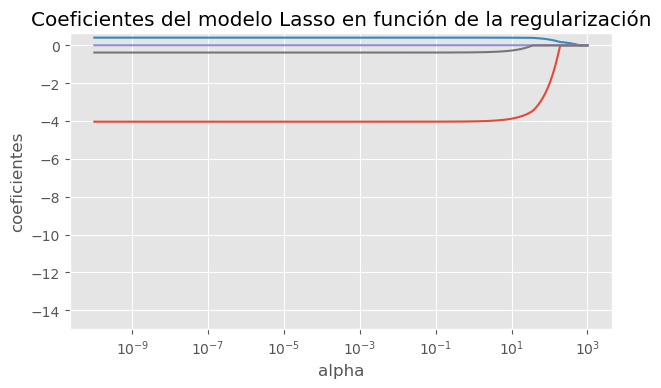

In [72]:
from sklearn.linear_model import LassoCV

# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Definir el modelo LassoCV para encontrar el mejor alpha automáticamente
modelo = LassoCV(alphas=np.logspace(-10, 3, 200), cv=10)

# Ajustar el modelo a los datos de entrenamiento
_ = modelo.fit(X_train, y_train)

# Obtener los alphas utilizados durante la búsqueda (opcional)
alphas = modelo.alphas_

# Evolución de los coeficientes en función de alpha
coefs = []
for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_)

# Visualización de la evolución de los coeficientes en función de alpha
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15, None])  # Ajusta el límite y según tus datos
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo Lasso en función de la regularización')
plt.show()

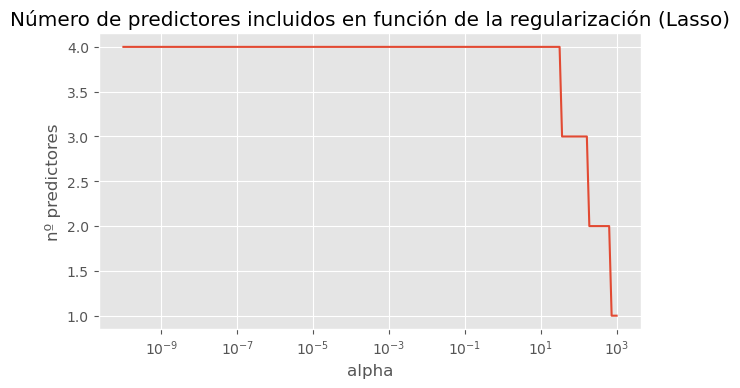

In [73]:
from sklearn.linear_model import LassoCV, Lasso

# Creación y entrenamiento del modelo LassoCV para búsqueda de alpha óptimo
modelo = LassoCV(alphas=np.logspace(-10, 3, 200), cv=10)

# Ajustar el modelo a los datos de entrenamiento
_ = modelo.fit(X_train, y_train)

# Obtener los alphas utilizados durante la búsqueda (opcional)
alphas = modelo.alphas_

# Número de predictores incluidos en función de alpha
n_predictores = []
for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_ != 0)
    n_predictores.append(coef_no_cero)

# Visualización del número de predictores incluidos en función de alpha
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Número de predictores incluidos en función de la regularización (Lasso)')
plt.show()


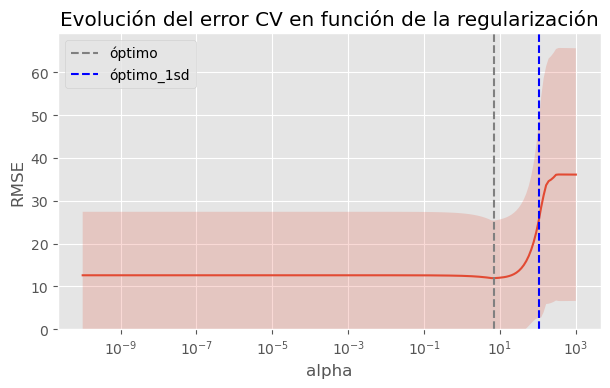

In [74]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [75]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")
print(f"Valor de alpha óptimo + 1SD: {optimo_1sd[0]}")

Mejor valor de alpha encontrado: 6.985879746785264
Valor de alpha óptimo + 1SD: 104.7370897959453


In [76]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Creación y entrenamiento del modelo LassoCV
# ==============================================================================
modelo = LassoCV(
            alphas    = np.logspace(-10, 3, 200),
            cv        = 10
         )
_ = modelo.fit(X_train, y_train)

# Mejor valor alpha encontrado
optimo = modelo.alpha_

# Crear un pipeline que primero escale los datos y luego ajuste el modelo Lasso
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=optimo))
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Ejemplo de predicciones en el conjunto de prueba
predicciones = pipeline.predict(X_test)
predicciones[:10]


array([67.01869192, 96.59865567, 95.56070547, 68.84262251, 55.56054653,
       48.61756585, 60.61726696, 48.90276515, 95.56070547, 35.55612018])

In [77]:
from sklearn.linear_model import Lasso
import numpy as np

# Asegúrate de que optimo_1sd sea un array de numpy
optimo_1sd = np.array(optimo_1sd) if isinstance(optimo_1sd, list) else np.array([optimo_1sd])

if optimo_1sd.size > 0:
    # Obtener el mejor valor de alpha encontrado + 1sd
    alpha_optimo_1sd = float(optimo_1sd[0])  # Convertir el primer elemento en float si es necesario

    # Crear y ajustar el modelo Lasso con el alpha óptimo + 1sd
    modelo_lasso = Lasso(alpha=alpha_optimo_1sd, fit_intercept=False)
    modelo_lasso.fit(X_train, y_train)
    
    # Aquí puedes realizar cualquier operación adicional con el modelo ajustado
    print("Modelo Lasso ajustado con éxito.")
else:
    print("No se encontraron valores en optimo_1sd. Revisa tu código o los resultados obtenidos.")


Modelo Lasso ajustado con éxito.


In [78]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,Age_at_Sale,-4.395954
1,Dead_Weight_Tons,0.251464
2,Trailing_1_Year_Avg_Monthly_Baltic_Dry,0.008188
3,Age_Sale_Flag,-0.056515


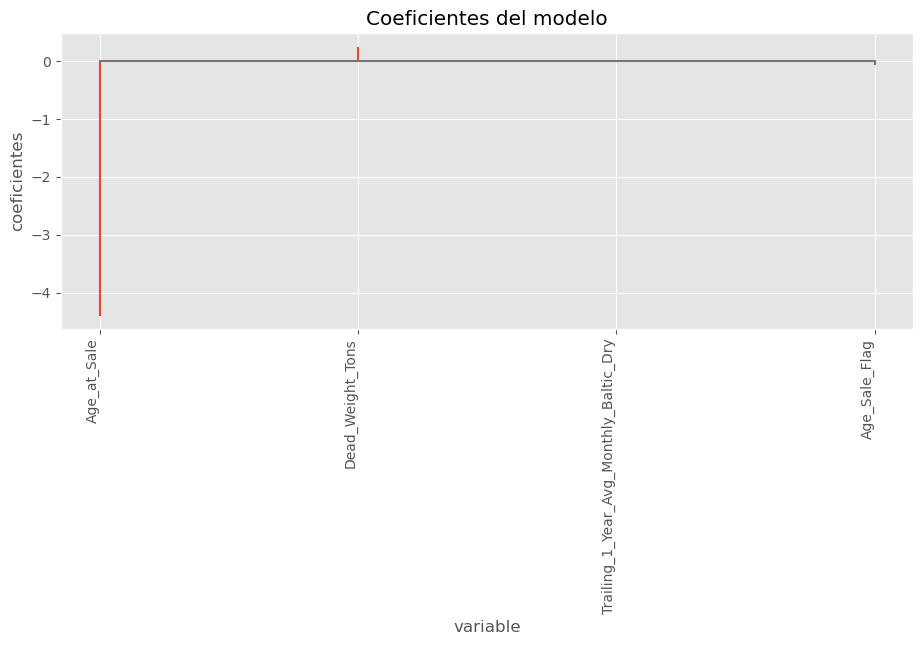

In [79]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [80]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([ 62.02269426, 110.66147866,  98.15475919,  68.3486532 ,
        50.85447375,  44.99096657,  55.09408407,  46.77764726,
        98.15475919,  20.2001311 ])

In [81]:
# Error de test del modelo 
# ==============================================================================
rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 10.849498816628675


Las predicciones del modelo final se alejan en promedio 10.85 unidades del valor real, utilizando los 4 predictores disponibles

## Comparación

Se compara el error de test (rmse) de los 4 modelos

In [82]:
import pandas as pd
import plotly.express as px

# Crear el DataFrame
df_comparacion = pd.DataFrame({
    'modelo': ['rmse_ols', 'Ridge', 'Lasso'],
    'test rmse': [rmse_ols, rmse_ridge, rmse_lasso]
})

# Crear gráfico dinámico con Plotly
fig = px.bar(
    df_comparacion,
    x='test rmse',
    y='modelo',
    orientation='h',  # Barras horizontales
    title='Comparación de modelos',
    labels={'test rmse': 'RMSE', 'modelo': 'Modelo'},
    text='test rmse'  # Mostrar valores en las barras
)

# Mejorar diseño
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  # Formato de valores
fig.update_layout(
    xaxis_title="RMSE",
    yaxis_title="Modelo",
    yaxis=dict(categoryorder='total ascending')  # Ordenar de menor a mayor
)

# Mostrar el gráfico
fig.show()


Los modelos de regularización (Ridge y Lasso) superan significativamente a la regresión lineal ordinaria (OLS). Entre ellos, Ridge muestra un rendimiento ligeramente superior en este caso. Esto sugiere que regularizar los coeficientes es crucial para mejorar las predicciones en este contexto.